<img src="images/arm_logo.png" width=250 alt="Project Pythia Logo"></img>

# Bankhead National Forest In-Situ Observation Locations

---

## Overview
For the Extracted Radar Columns and In-Situ Sensors (RadCLss) Product, 
investigation of the location of available in-situ sensors with respect to the 
C-SAPR2 is desired.

This notebook utilizes GeoPandas and Cartopy to map various observational assets
around the ARM AMF site and creates displays of:
1. ARM Mobile Facility (AMF) Main Site.
1. 3rd Party Observational Networks.
1. Spatial Display for Potential RadCLss columns.  

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Necessary | |
| [Understanding of NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf.html) | Helpful | Familiarity with metadata structure |
| [GeoPandas](https://geopandas.org/en/stable/docs.html) | Necessary | |

- **Time to learn**: estimate in minutes. For a rough idea, use 5 mins per subsection, 10 if longer; add these up for a total. Safer to round up and overestimate.
- **System requirements**:
    - Populate with any system, version, or non-Python software requirements if necessary
    - Otherwise use the concepts table above and the Imports section below to describe required packages as necessary
    - If no extra requirements, remove the **System requirements** point altogether

---

## Imports

In [21]:
import fiona
import warnings

import matplotlib.pyplot as plt
import geopandas as gpd
from metpy.plots import USCOUNTIES

from cartopy import crs as ccrs, feature as cfeature
from cartopy.io.img_tiles import OSM

fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw' # enable KML support which is disabled by default

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## ARM Mobile Facility (AMF) Main Site

---

### Read in the KMZ file provide by the ARM site operations team

In [22]:
# note: the KMZ file provided contains multiple geometry columns. 
in_layers = []
for layer in fiona.listlayers("locations/BNF.kmz"):
    print(layer)
    s = gpd.read_file("locations/BNF.kmz", layer=layer)
    in_layers.append(s)

BNF_Schematic
M1
S10
S13
S14
S20
S30
S40
S3
S4
Original_Proclaimed_National_Forests_and_National_Grasslands_(Feature_Layer).kml
Original_Proclaimed_National_Forests_and_National_Grasslands__Feature_Layer_


### Inspect the GeoPandas DataFrames

In [23]:
# Overall BNF Schematic
in_layers[0]

Name  \
0  USFS Black Warrior Work Center   
1                     BNF Airshed   
2                         Moulton   
3                         Decatur   
4                      Huntsville   

                                         description timestamp begin end  \
0                                                NaN       NaT   NaT NaT   
1                                                NaN       NaT   NaT NaT   
2  <!DOCTYPE html><html><head></head><body><scrip...       NaT   NaT NaT   
3  <!DOCTYPE html><html><head></head><body><scrip...       NaT   NaT NaT   
4  <!DOCTYPE html><html><head></head><body><scrip...       NaT   NaT NaT   

   altitudeMode  tessellate  extrude  visibility  drawOrder  icon  \
0           NaN          -1        0          -1        NaN   NaN   
1           NaN           1        0          -1        NaN   NaN   
2           NaN          -1        0          -1        NaN   NaN   
3           NaN          -1        0          -1        NaN   NaN   
4           NaN          -1        0          -1        NaN   NaN   

                                        placepageUri  \
0                                                NaN   
1                                                NaN   
2  https://www.google.com/earth/rpc/entity?lat=34...   
3  https://www.google.com/earth/rpc/entity?lat=34...   
4  https://www.google.com/earth/rpc/entity?lat=34...   

                                            geometry  
0               POINT Z (-87.33828 34.34391 0.00000)  
1  POLYGON Z ((-87.45322 34.17856 0.00000, -86.92...  
2  GEOMETRYCOLLECTION Z (POINT Z (-87.29335 34.48...  
3  GEOMETRYCOLLECTION Z (POINT Z (-86.98334 34.60...  
4  GEOMETRYCOLLECTION Z (POINT Z (-86.58610 34.73...

<Axes: >

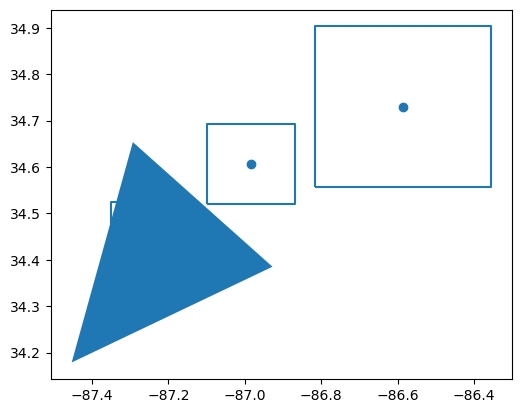

In [24]:
# Display all the layers
in_layers[0].plot()

<Axes: >

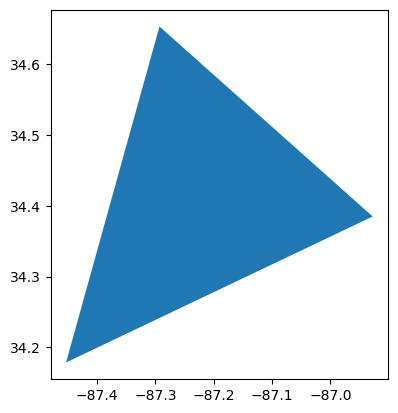

In [25]:
# Display the `BNF Airshed`
in_layers[0].loc[[1], 'geometry'].plot()

In [26]:
# Inspect the ARM AMF M1 GeoDataFrame
in_layers[1]

Name  description timestamp begin end  \
0                                    CEIL          NaN       NaT   NaT NaT   
1                                   MWR3C          NaN       NaT   NaT NaT   
2                                     GIF          NaN       NaT   NaT NaT   
3                                   MWR3C          NaN       NaT   NaT NaT   
4                                      M1          NaN       NaT   NaT NaT   
5                     Possible Fence Path          NaN       NaT   NaT NaT   
6                                AL SR-33          NaN       NaT   NaT NaT   
7                             Main Office          NaN       NaT   NaT NaT   
8                                    CEIL          NaN       NaT   NaT NaT   
9                                     RWP          NaN       NaT   NaT NaT   
10                                    RWP          NaN       NaT   NaT NaT   
11                                    AOS          NaN       NaT   NaT NaT   
12                               AERI/MPL          NaN       NaT   NaT NaT   
13                                   KAZR          NaN       NaT   NaT NaT   
14                              Guest AOS          NaN       NaT   NaT NaT   
15                                   HSRL          NaN       NaT   NaT NaT   
16                                     RL          NaN       NaT   NaT NaT   
17                          Storm Shelter          NaN       NaT   NaT NaT   
18                               Walkways          NaN       NaT   NaT NaT   
19                                Parking          NaN       NaT   NaT NaT   
20                                    INS          NaN       NaT   NaT NaT   
21                                     LD          NaN       NaT   NaT NaT   
22                                    IRT          NaN       NaT   NaT NaT   
23                                 CSPHOT          NaN       NaT   NaT NaT   
24                                 SKYRAD          NaN       NaT   NaT NaT   
25                                    ASI          NaN       NaT   NaT NaT   
26                                   MAWS          NaN       NaT   NaT NaT   
27                                   BBSS          NaN       NaT   NaT NaT   
28                           TBS Clearing          NaN       NaT   NaT NaT   
29                  Main Instrument Field          NaN       NaT   NaT NaT   
30  Main Instrument Field Already Cleared          NaN       NaT   NaT NaT   
31                   TBS Planned Clearing          NaN       NaT   NaT NaT   
32                             Containers          NaN       NaT   NaT NaT   
33                                    Gif          NaN       NaT   NaT NaT   
34                              MET Tower          NaN       NaT   NaT NaT   
35                                    ORG          NaN       NaT   NaT NaT   
36                                    PWD          NaN       NaT   NaT NaT   
37                                   TBRG          NaN       NaT   NaT NaT   
38                                   VDIS          NaN       NaT   NaT NaT   
39                                     WB          NaN       NaT   NaT NaT   

    altitudeMode  tessellate  extrude  visibility  drawOrder  icon  \
0            NaN           1        0          -1        NaN   NaN   
1            NaN          -1        0          -1        NaN   NaN   
2            NaN          -1        0          -1        NaN   NaN   
3            NaN           1        0          -1        NaN   NaN   
4            NaN          -1        0          -1        NaN   NaN   
5            NaN           1        0          -1        NaN   NaN   
6            NaN          -1        0          -1        NaN   NaN   
7            NaN           1        0          -1        NaN   NaN   
8            NaN          -1        0          -1        NaN   NaN   
9            NaN           1        0          -1        NaN   NaN   
10           NaN          -1        0          -1        NaN   NaN  

In [27]:
in_layers[1].iloc[4]

Name                                                          M1
description                                                  NaN
timestamp                                                    NaT
begin                                                        NaT
end                                                          NaT
altitudeMode                                                 NaN
tessellate                                                    -1
extrude                                                        0
visibility                                                    -1
drawOrder                                                    NaN
icon                                                         NaN
geometry        POINT Z (-87.33841564329165 34.34525430686622 0)
Name: 4, dtype: object

<Axes: >

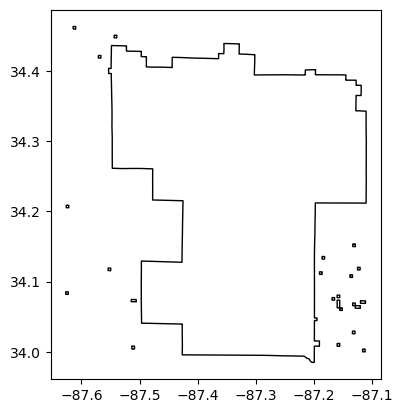

In [28]:
# BNF Forest Outline
in_layers[11].plot(facecolor="None", edgecolor="black")

### ARM AMF M1 Site Display

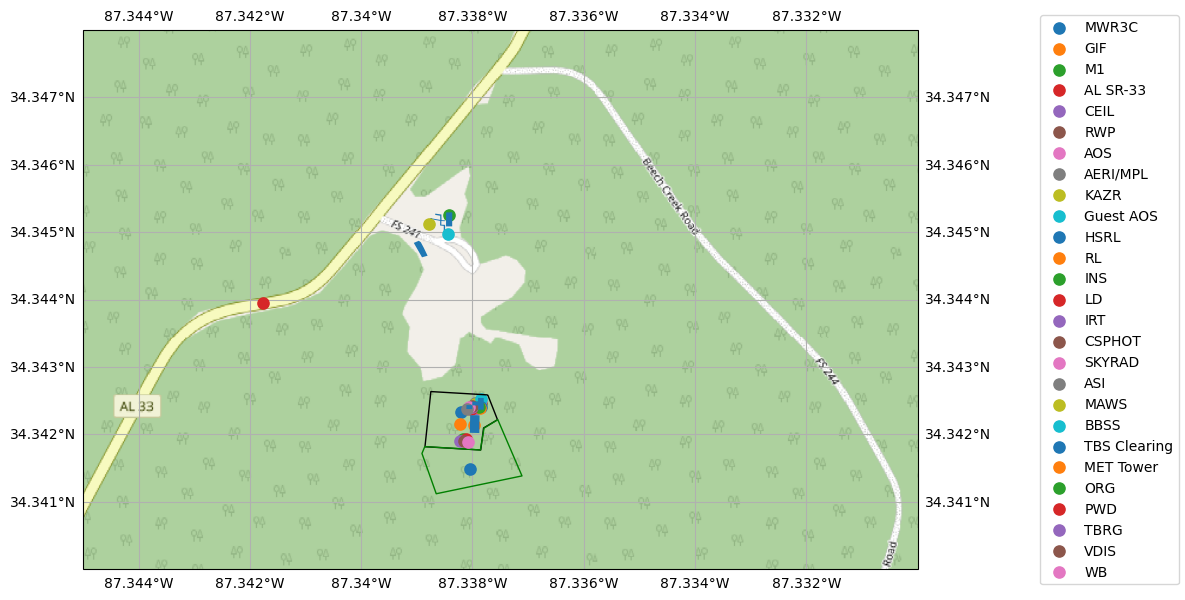

In [29]:
# Set up the figure
fig = plt.figure(figsize=(14, 7))
# Initialize OpenStreetMap tile
tiler = OSM()
# Create a subplot and define projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add some various map elements to the plot to make it recognizable.
# Initialize OpenStreetMap tile
tiler = OSM()
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.add_image(tiler, 16, zorder=1)
# Set the BNF Domain (adjust later for various groups)
ax.set_extent([272.655, 272.67, 34.340, 34.348])
ax.gridlines(draw_labels=True)

for index in in_layers[1].index:
    # Skipping fence marking and main instrument field polygons, leaving instruments
    # Was making legend messy, and unable to set right side gridlines to false
    if index != 5 and index != 29: 
        if in_layers[1].loc[[index], 'Name'].values[0] == "TBS Planned Clearing":
                in_layers[1].loc[[index], 'geometry'].plot(transform=ccrs.PlateCarree(),     
                                                           ax=ax, 
                                                           label=in_layers[1].loc[[index], 'Name'].values[0],
                                                           zorder=2,
                                                           facecolor="none",
                                                           edgecolor="green",
                                                           markersize=65)
        elif in_layers[1].loc[[index], 'Name'].values[0] == "Main Instrument Field Already Cleared":
                in_layers[1].loc[[index], 'geometry'].plot(transform=ccrs.PlateCarree(),     
                                                           ax=ax, 
                                                           label=in_layers[1].loc[[index], 'Name'].values[0],
                                                           zorder=2,
                                                           facecolor="none",
                                                           markersize=65)
        else:
            in_layers[1].loc[[index], 'geometry'].plot(transform=ccrs.PlateCarree(),     
                                                       ax=ax, 
                                                       label=in_layers[1].loc[[index], 'Name'].values[0],
                                                       zorder=2,
                                                       markersize=65)

ax.spines['right'].set_visible(False)
# Add a legend
# Place a legend to the right of this smaller subplot.
fig.legend(loc='right')

# Set the DPI to a higher value (e.g., 300)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300



## 3rd Party Observational Network

---

In [30]:
site_locations = gpd.read_file("locations/ARM-SE.kmz")
site_locations

Name  description timestamp begin end  altitudeMode  \
0           SurfRad Station          NaN       NaT   NaT NaT           NaN   
1         USCRN Gadsden, AL          NaN       NaT   NaT NaT           NaN   
2   USCRN Holly Springs, MS          NaN       NaT   NaT NaT           NaN   
3           USCRN Selma, AL          NaN       NaT   NaT NaT           NaN   
4          USCRN Newton, MS          NaN       NaT   NaT NaT           NaN   
5           NEON Tall Tower          NaN       NaT   NaT NaT           NaN   
6           UAH-ARMOR Radar          NaN       NaT   NaT NaT           NaN   
7     Courtland Airport RWP          NaN       NaT   NaT NaT           NaN   
8        Black Warrior Site          NaN       NaT   NaT NaT           NaN   
9        Bill Pugh Airfield          NaN       NaT   NaT NaT           NaN   
10          Cullman Airport          NaN       NaT   NaT NaT           NaN   
11               Tower Area          NaN       NaT   NaT NaT           NaN   

    tessellate  extrude  visibility  drawOrder  icon  \
0           -1        0          -1        NaN   NaN   
1           -1        0          -1        NaN   NaN   
2           -1        0          -1        NaN   NaN   
3           -1        0          -1        NaN   NaN   
4           -1        0          -1        NaN   NaN   
5           -1        0          -1        NaN   NaN   
6           -1        0          -1        NaN   NaN   
7           -1        0          -1        NaN   NaN   
8           -1        0          -1        NaN   NaN   
9           -1        0          -1        NaN   NaN   
10          -1        0          -1        NaN   NaN   
11          -1        0          -1        NaN   NaN   

                                geometry  
0   POINT Z (-89.87363 34.25499 0.00000)  
1   POINT Z (-85.96000 34.28500 0.00000)  
2   POINT Z (-89.42998 34.82192 0.00000)  
3   POINT Z (-87.23889 32.45711 0.00000)  
4   POINT Z (-89.07000 32.33699 0.00000)  
5   POINT Z (-87.39326 32.95047 0.00000)  
6   POINT Z (-86.77154 34.64614 0.00000)  
7   POINT Z (-87.34417 34.65876 0.00000)  
8   POINT Z (-87.33853 34.34511 0.00000)  
9   POINT Z (-87.70960 34.45318 0.00000)  
10  POINT Z (-86.85871 34.26744 0.00000)  
11  POINT Z (-87.35028 34.34361 0.00000)

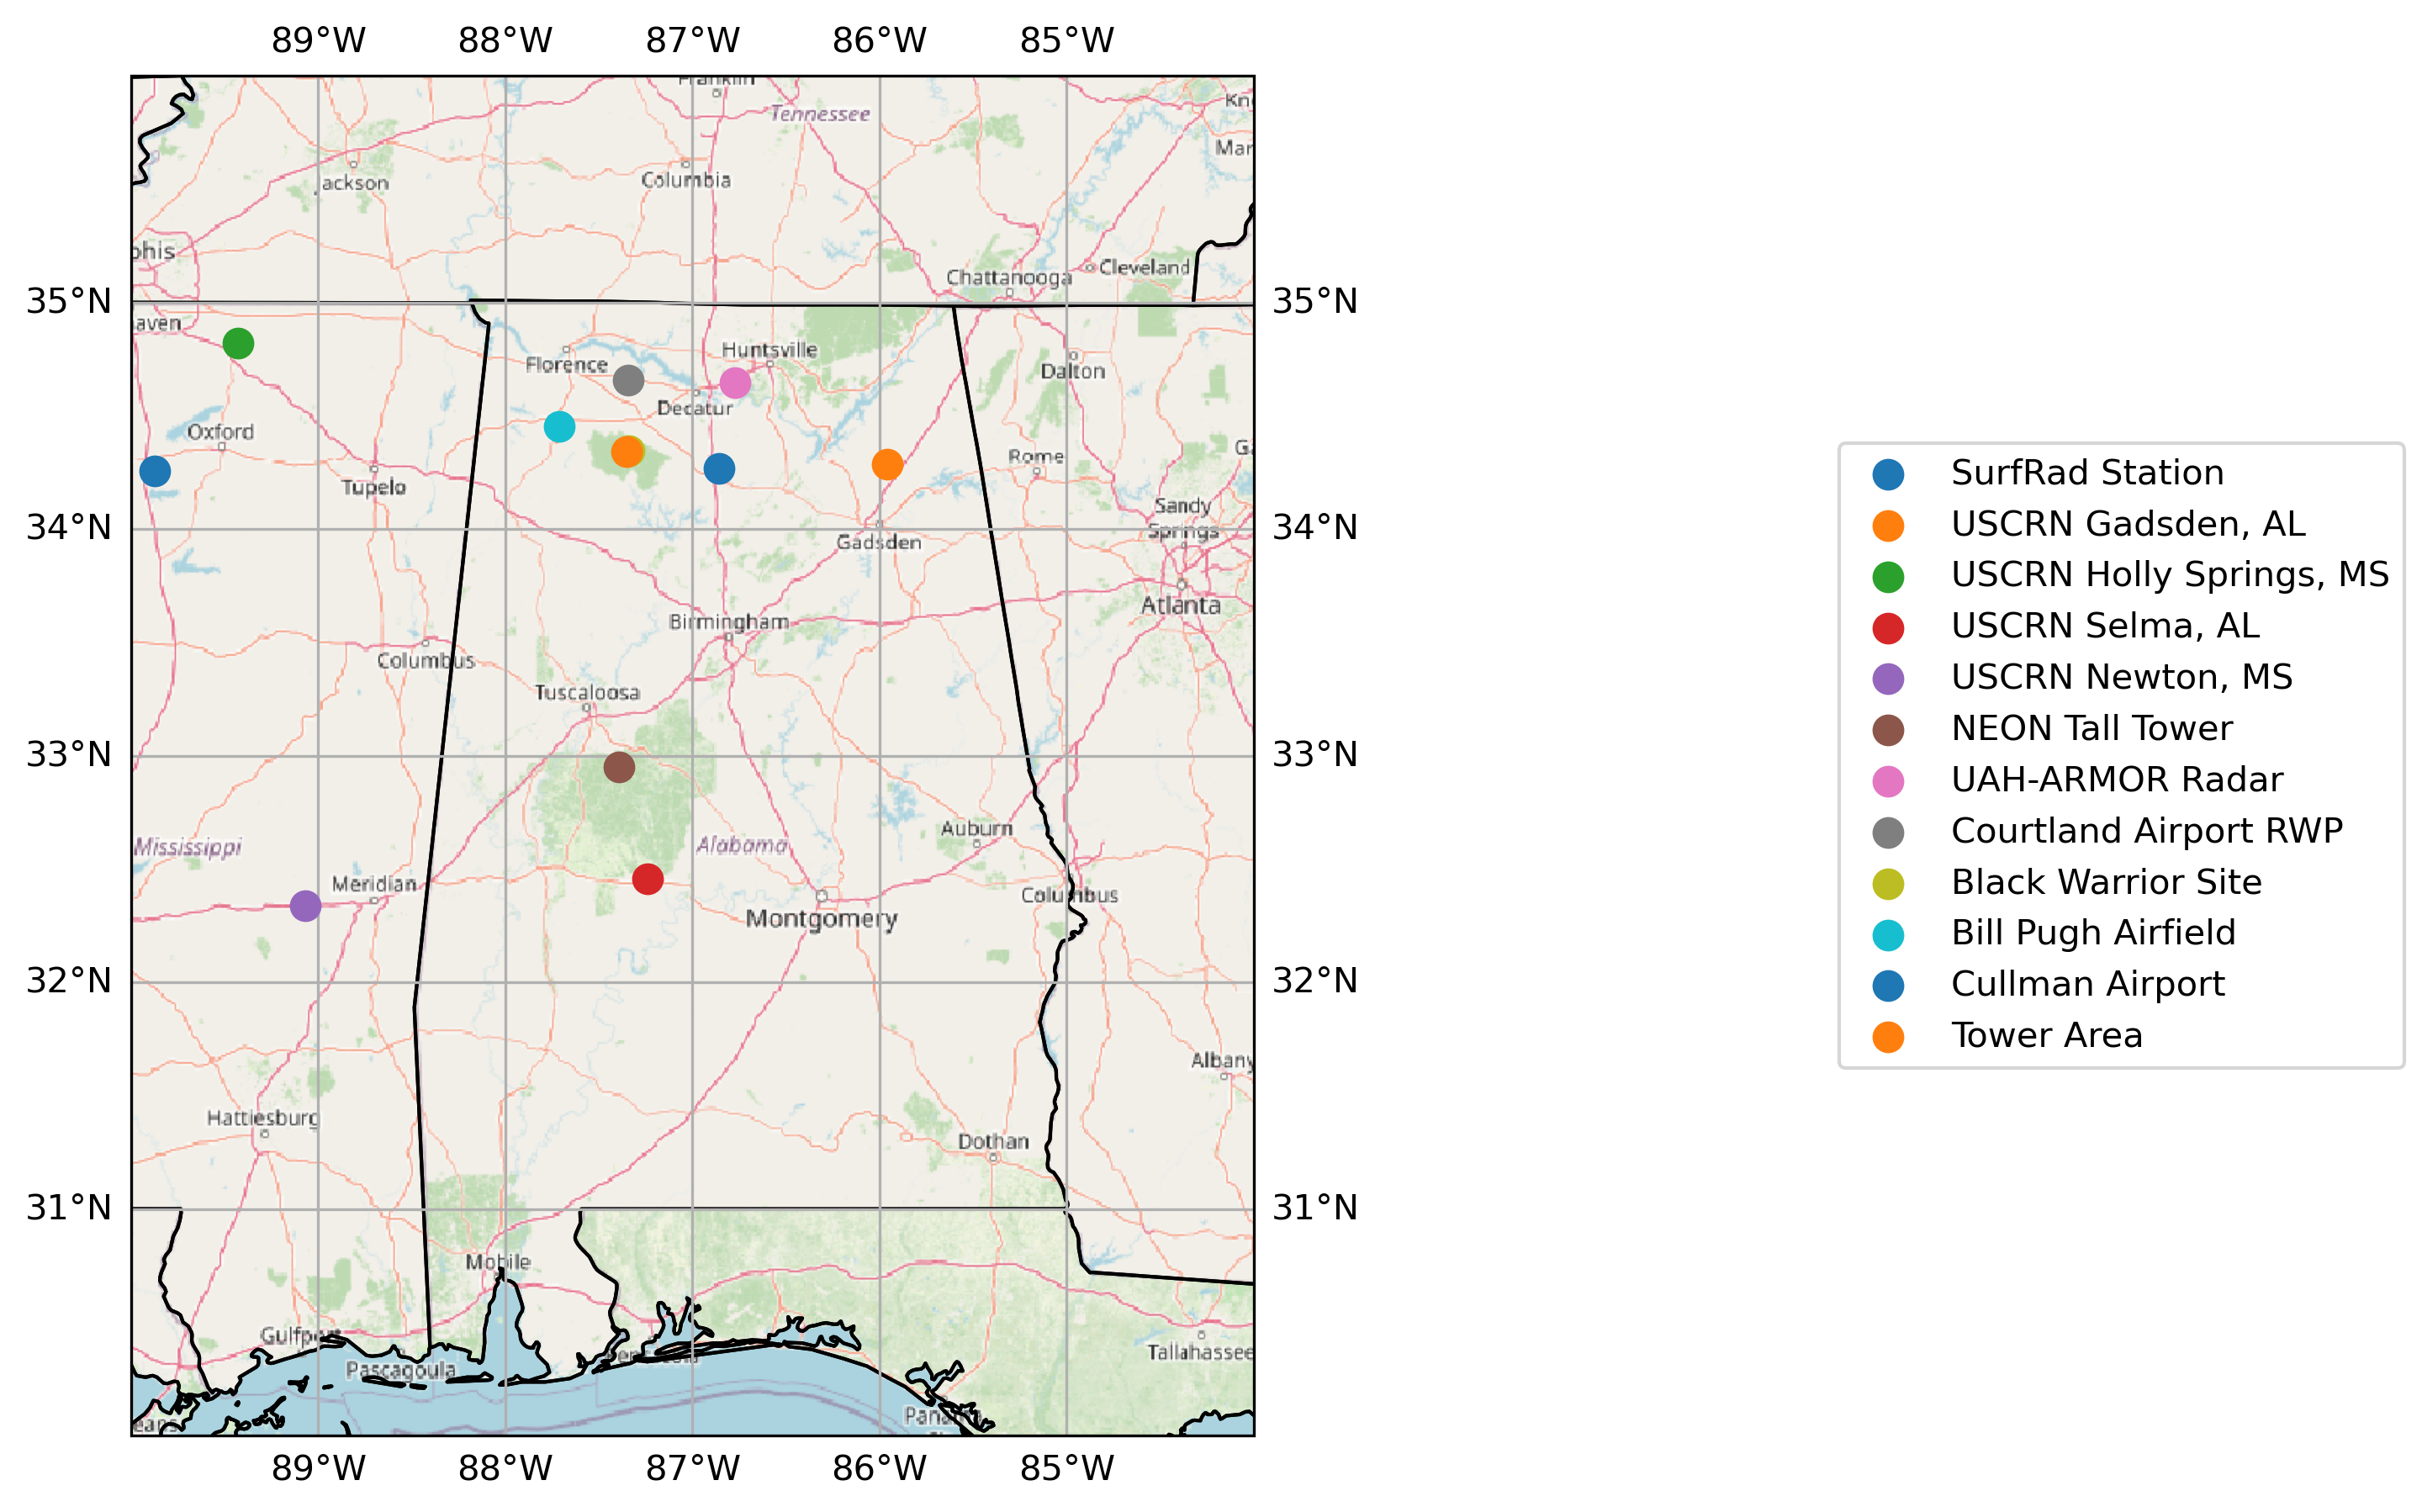

In [31]:
# Set up the figure
fig = plt.figure(figsize=(14, 7))
# Initialize OpenStreetMap tile
tiler = OSM()
# Create a subplot and define projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add some various map elements to the plot to make it recognizable.
# Initialize OpenStreetMap tile
tiler = OSM()
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.add_image(tiler, 7, zorder=1)
# Set the BNF Domain (adjust later for various groups)
ax.set_extent([270.0, 276.0, 36.0, 30.0])
ax.gridlines(draw_labels=True)

for index in site_locations.index:
    site_locations.loc[[index], 'geometry'].plot(transform=ccrs.PlateCarree(),     
                                                 ax=ax, 
                                                 label=site_locations.loc[[index], 'Name'].values[0],
                                                 zorder=2,
                                                 markersize=65)


# Add a legend
# Place a legend to the right of this smaller subplot.
fig.legend(loc='right')

# Set the DPI to a higher value (e.g., 300)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## Spatial Display for Potential RadCLss Columns

---

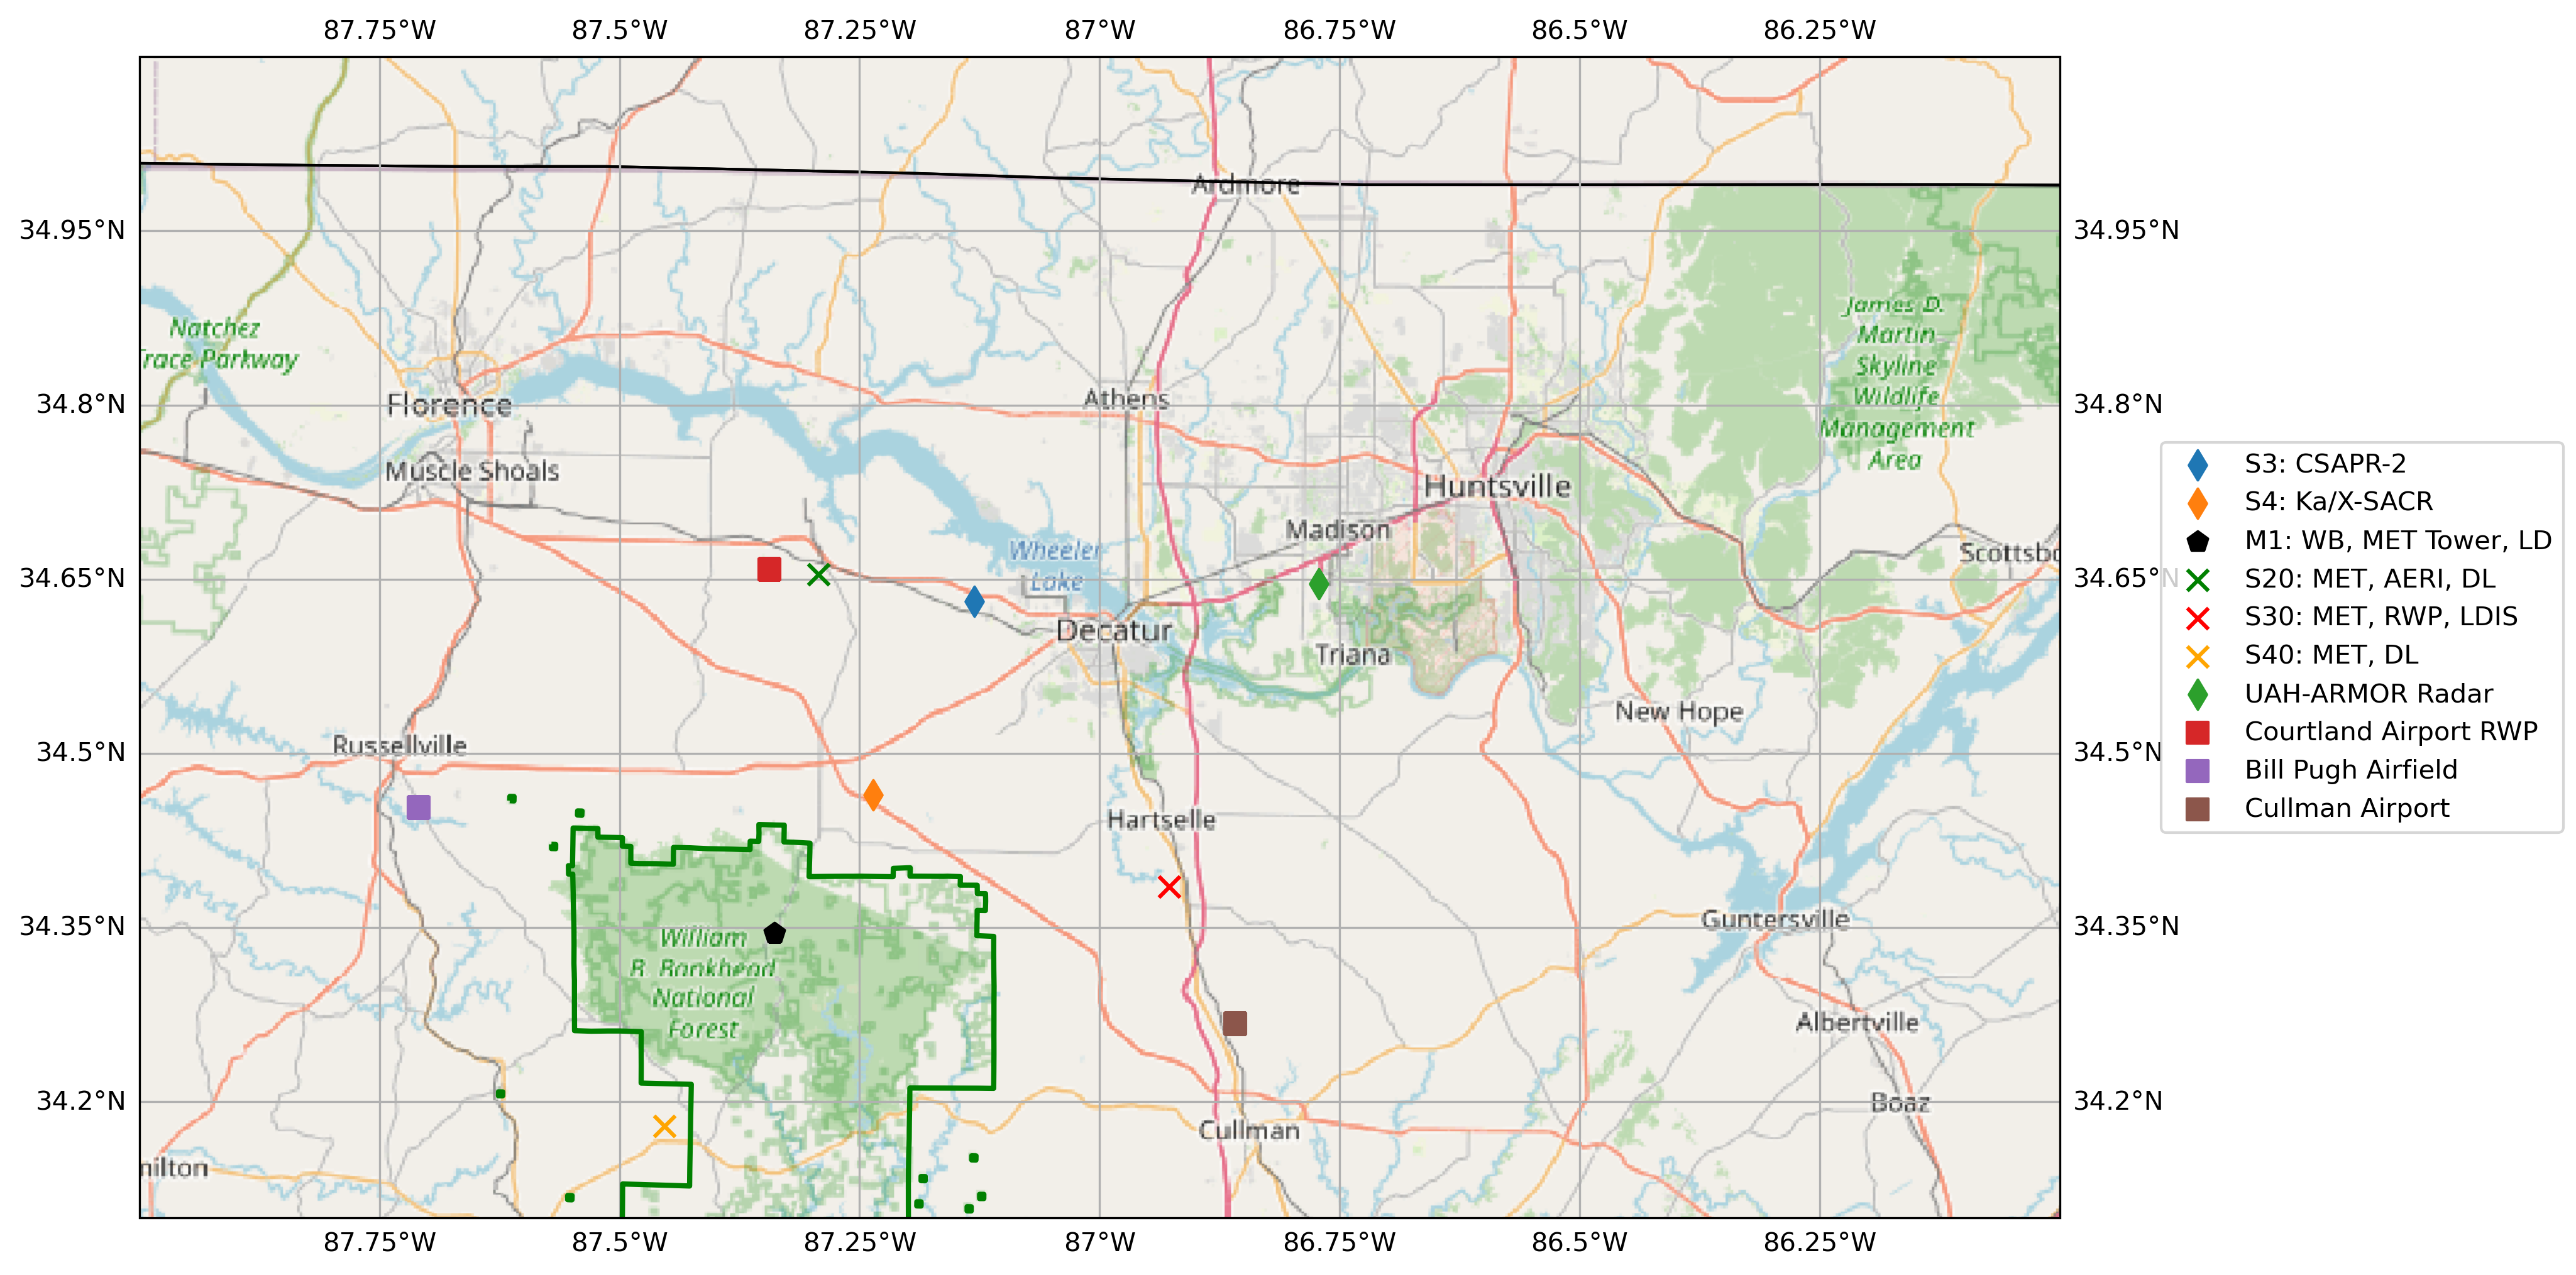

In [34]:
# define the center of the map to be the CSAPR2
central_lon = -87.13076
central_lat = 34.63080

# Set up the figure
fig = plt.figure(figsize=(16, 8))
# Initialize OpenStreetMap tile
tiler = OSM()
# Create a subplot and define projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add some various map elements to the plot to make it recognizable.
# Initialize OpenStreetMap tile
tiler = OSM()
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.add_image(tiler, 9, zorder=1)
# Set the BNF Domain (adjust later for various groups)
ax.set_extent([272.0, 274.0, 35.1, 34.1])
ax.gridlines(draw_labels=True)

# add in kmz file layers
# BNF Forest Preserve Land
in_layers[11].plot(transform=ccrs.PlateCarree(),
                   facecolor="none", 
                   edgecolor="green",
                   linewidth=2.0,
                   ax=ax,
                   label="BNF Forest Preserve",
                   zorder=2)
# CSAPR2 location
in_layers[8].plot(transform=ccrs.PlateCarree(),     
                  ax=ax, 
                  label="S3: CSAPR-2",
                  zorder=2,
                  marker="d",
                  markersize=65)
# X-SAPR location
in_layers[9].plot(transform=ccrs.PlateCarree(),     
                  ax=ax, 
                  label="S4: Ka/X-SACR",
                  zorder=2,
                  marker="d",
                  markersize=65)
# M1 location
in_layers[1].loc[[4], 'geometry'].plot(transform=ccrs.PlateCarree(),     
                                       ax=ax, 
                                       label="M1: WB, MET Tower, LD",
                                       zorder=2,
                                       marker="p",
                                       color="black",
                                       markersize=65)

# S20 location - MET, AERI, DL
in_layers[5].plot(transform=ccrs.PlateCarree(),     
                          ax=ax, 
                          label="S20: MET, AERI, DL",
                          zorder=2,
                          marker="x",
                          color="green",
                          markersize=65)

# S30 location - MET, RWP, LDIS
in_layers[6].plot(transform=ccrs.PlateCarree(),     
                          ax=ax, 
                          label="S30: MET, RWP, LDIS",
                          zorder=2,
                          marker="x",
                          color="red",
                          markersize=65)

# S40 location - MET, AERI, DL
in_layers[7].plot(transform=ccrs.PlateCarree(),     
                          ax=ax, 
                          label="S40: MET, DL",
                          zorder=2,
                          marker="x",
                          color="orange",
                          markersize=65)

# Add in the 3rd Party Sites
site_locations.loc[[6], 'geometry'].plot(transform=ccrs.PlateCarree(),     
                                         ax=ax, 
                                         label=site_locations.loc[[6], 'Name'].values[0],
                                         zorder=2,
                                         markersize=65,
                                         marker='d')
site_locations.loc[[7], 'geometry'].plot(transform=ccrs.PlateCarree(),     
                                         ax=ax, 
                                         label=site_locations.loc[[7], 'Name'].values[0],
                                         zorder=2,
                                         markersize=65,
                                         marker='s')
site_locations.loc[[9], 'geometry'].plot(transform=ccrs.PlateCarree(),     
                                         ax=ax, 
                                         label=site_locations.loc[[9], 'Name'].values[0],
                                         zorder=2,
                                         markersize=65,
                                         marker='s')
site_locations.loc[[10], 'geometry'].plot(transform=ccrs.PlateCarree(),     
                                         ax=ax, 
                                         label=site_locations.loc[[10], 'Name'].values[0],
                                         zorder=2,
                                         markersize=65,
                                         marker='s')

# Add a legend
# Place a legend to the right of this smaller subplot.
fig.legend(loc='right')

# Set the DPI to a higher value (e.g., 300)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300